<a href="https://colab.research.google.com/github/NISHTHA0305/ML_Model/blob/main/SarimaModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Weather Data 2014-11-30.xlsx to Weather Data 2014-11-30 (3).xlsx


<ipython-input-7-e9f45a41688a>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset_df = subset_df.fillna(method='ffill').fillna(method='ffill')


Remaining exog columns: ['Date', 'Month', 'Hour', 'TempOut', 'HiTemp', 'LowTemp', 'OutHum', 'DewPt', 'WindSpeed', 'WindRun', 'HiSpeed', 'WindChill', 'HeatIndex', 'THWIndex', 'Bar', 'Rain', 'RainRate', 'SolarRad', 'HiSolarRad', 'HeatD-D', 'CoolD-D', 'InTemp', 'InHum', 'InDew', 'InHeat', 'InEMC', 'InAirDensity', 'ET', 'WindSamp', 'WindTx', 'ISSRecept', 'ArcInt']
Train shape: (7999, 38)
Test shape: (2000, 38)
Missing in train[target_col]: 0
Missing in train[exog]: 0


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


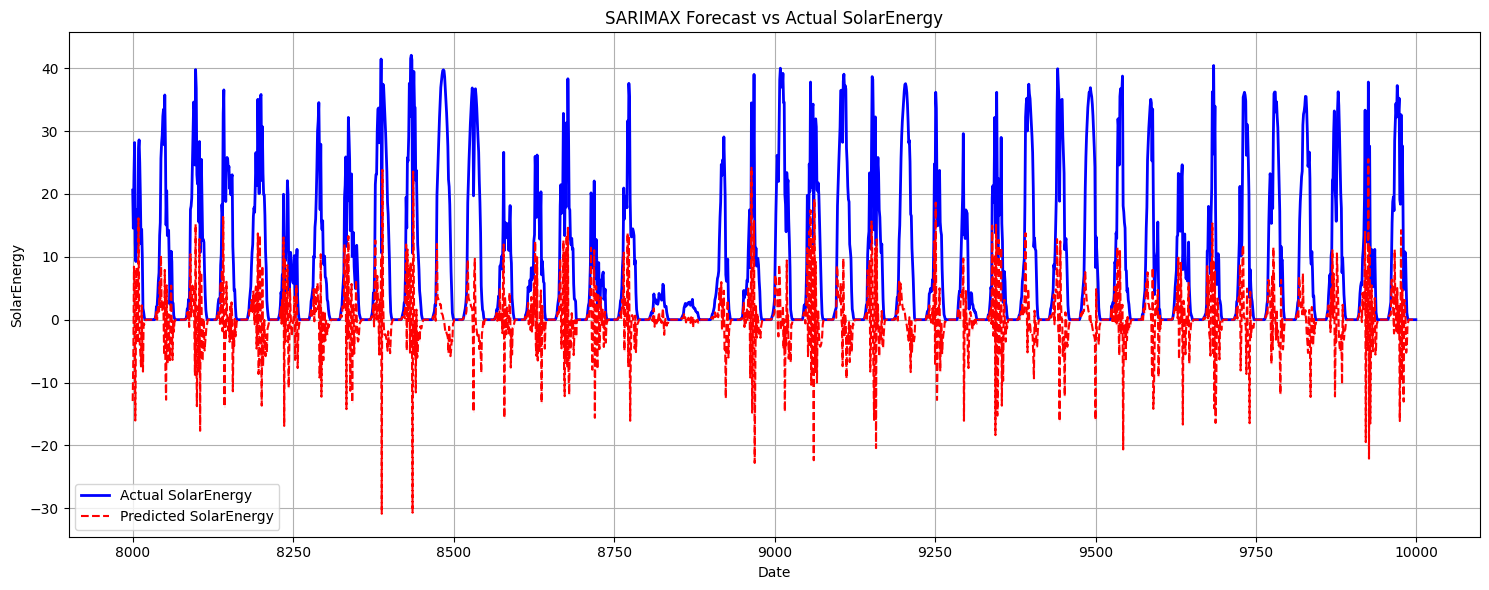

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from google.colab import files
uploaded=files.upload()
df = pd.read_excel('Weather Data 2014-11-30.xlsx', sheet_name='Weather Data')
subset_df = df[1:10000]

subset_df = subset_df.apply(pd.to_numeric, errors='coerce')

target_col = 'SolarEnergy'
exog_cols = [col for col in subset_df.columns if col != target_col]

subset_df = subset_df.fillna(method='ffill').fillna(method='ffill')

train_size = int(len(subset_df) * 0.8)
train = subset_df.iloc[:train_size]
test = subset_df.iloc[train_size:]

threshold = int(0.2 * len(train))
exog_cols_cleaned = [col for col in exog_cols if train[col].isnull().sum() < threshold]
print("Remaining exog columns:", exog_cols_cleaned)
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Missing in train[target_col]:", train[target_col].isnull().sum())
print("Missing in train[exog]:", train[exog_cols_cleaned].isnull().sum().sum())

# Fit SARIMAX
model = SARIMAX(
    train[target_col],
    exog=train[exog_cols_cleaned],
    order=(1, 1, 1),
    seasonal_order=(1, 0, 1, 24),
    enforce_stationarity=False,
    enforce_invertibility=False,
    simple_differencing=True  # Speeds up computation
)
results = model.fit(disp=True)
# Forecast
forecast = results.get_forecast(steps=len(test), exog=test[exog_cols_cleaned])
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot
plt.figure(figsize=(15, 6))
plt.plot(test.index, test[target_col], label='Actual SolarEnergy', color='blue', linewidth=2)
plt.plot(test.index, predicted_mean, label='Predicted SolarEnergy', color='red', linestyle='--')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMAX Forecast vs Actual SolarEnergy')
plt.xlabel('Date')
plt.ylabel('SolarEnergy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
